In [1]:
#import scipy.fftpack as FFT
import numpy as np
import matplotlib.pyplot as plt 
#from scipy.integrate import odeint
from scipy.optimize import fsolve 
from scipy.optimize import newton 
from scipy.optimize import brentq
from scipy.optimize import bisect
from scipy.optimize import minimize_scalar

def get_u(x,s):
    v=-np.exp(-.5*(x/s)**2)*np.sin(np.pi*x)
    A=np.trapz(x=x,y=np.abs(v))
    return v/A

def get_I(x,s):
    xc=.5*(x[1:]+x[:-1])
    u=get_u(xc,s)
    I=np.zeros(len(x))
    I[0]=0
    #use the midpoint rule
    for ii in range(1,len(x)):
        I[ii]=I[ii-1]+(x[ii]-x[ii-1])*u[ii-1]
    return -I

def get_h(hl,x,s,alpha):
    I=get_I(x,s)
    return np.power((alpha-1.)/alpha*I+np.power(hl,alpha-1),1./(alpha-1.))

def get_V(hl,x,s,alpha):
    h=get_h(hl,x,s,alpha)
    return -np.trapz(x=x,y=h)

def get_R(hl,x,s,alpha,V0):
    V=get_V(hl,x,s,alpha)
    print(hl)
    print(V0)
    print(V)
    print(V-V0)
    return V-V0

def get_hl(hl0,x,s,alpha,V0):
    hl=bisect(get_R,0,hl0,args=(x,s,alpha,V0))
    return hl

def get_profile(hl0,x,s,alpha,V):
    hl=get_hl(hl0,x,s,alpha,V)
    print(hl-hl0)
    h=get_h(hl,x,s,alpha)
    return h 

In [2]:
x=np.linspace(1,0,201)
s=1.
h0=.2
V=-np.trapz(x=x,y=np.ones(len(x))*h0)
alpha=4.
h=get_profile(h0,x,s,alpha,V)
plt.plot(x,h)
plt.show()

0.0
0.2
0.630734305269
0.430734305269
0.2
0.2
0.646759135883
0.446759135883


ValueError: f(a) and f(b) must have different signs

In [3]:
V0=get_V(0,x,s,alpha)
V1=get_V(h0,x,s,alpha)
print(V0)
print(V1)

0.630734305269
0.646759135883


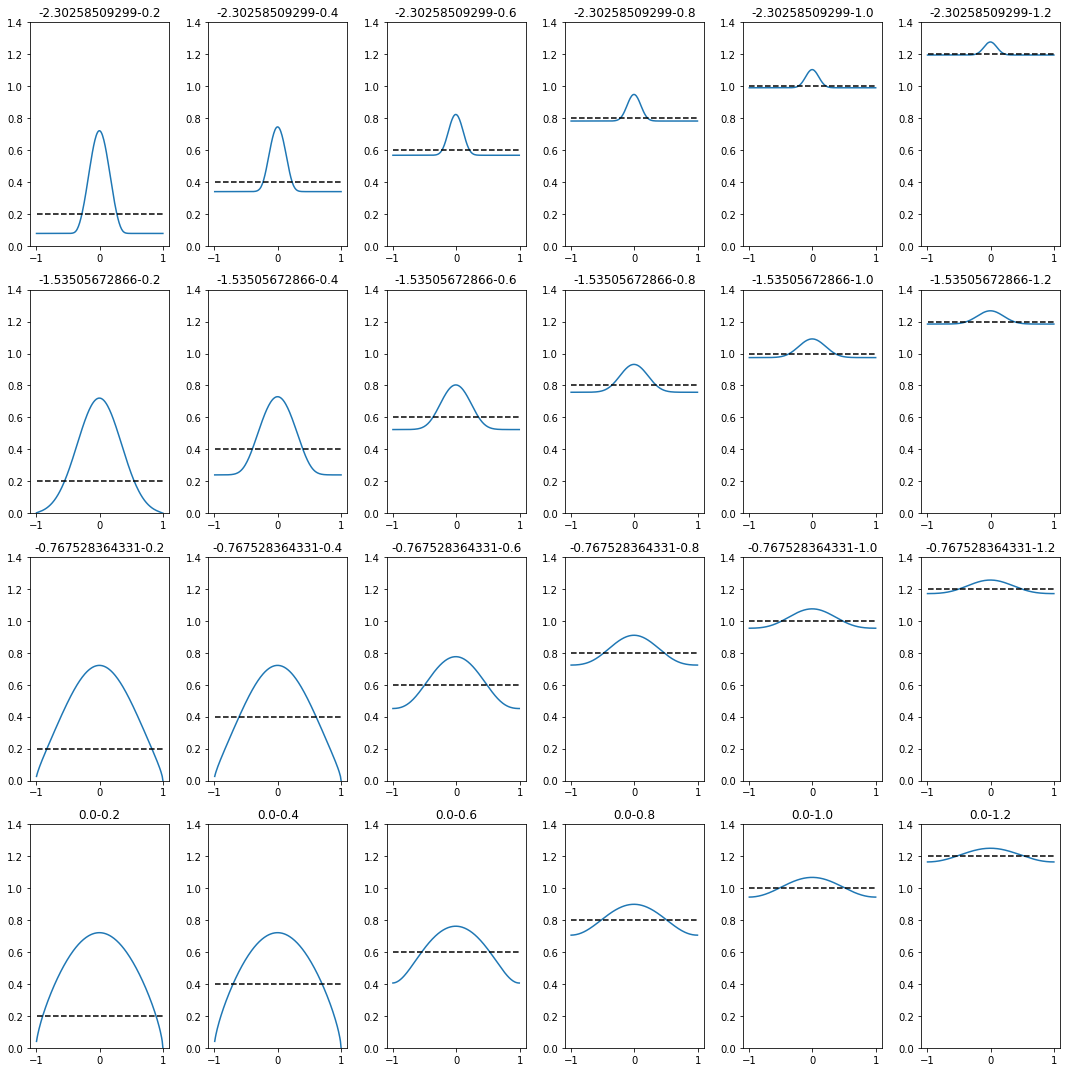

In [31]:
plt.figure(0,figsize=(15,15),facecolor='white')
for ii in range(0,len(s)):
    for jj in range(0,len(c0)):
        plt.subplot(len(s),len(c0),ii*len(c0)+jj+1)
        plt.plot(xc,H[ii,jj])
        plt.plot([xc[0],xc[-1]],[c0[jj],c0[jj]],'k--')
        plt.title(str(s[ii])+'-'+str(c0[jj]))
        plt.ylim(0,1.4)
plt.tight_layout()
plt.show()

In [4]:
def dhdx(h,alpha,x,s):
    u=uw(x,s)
    return u/(aplha*np.power(h,alpha-2))

x=np.linspace(0,1)